In [40]:
import jax
import tensorflow_probability.substrates.jax.bijectors as tfb
import tensorflow_probability.substrates.jax.distributions as tfd

import liesel.experimental.optim as opt
import liesel.model as lsl

We take a super simple Liesel model here

In [41]:
xval = 2.0 * jax.random.normal(jax.random.key(42), (10_000,)) + 3.0

In [42]:
m = lsl.Var.new_param(0.0, name="m")
s = lsl.Var.new_param(1.0, name="s")
s.transform(tfb.Exp())
x = lsl.Var.new_obs(
    xval,
    distribution=lsl.Dist(tfd.Normal, loc=m, scale=s),
    name="x",
)
p = lsl.Model([x])

In [43]:
engine = opt.QuickOptim(p, optimizers="lbfgs").build_engine()

In [44]:
res = engine.fit()

Training loss: 21033.506, Validation loss: 21033.506:   2%|▏         | 21/1000 [00:00<00:16, 59.97it/s]


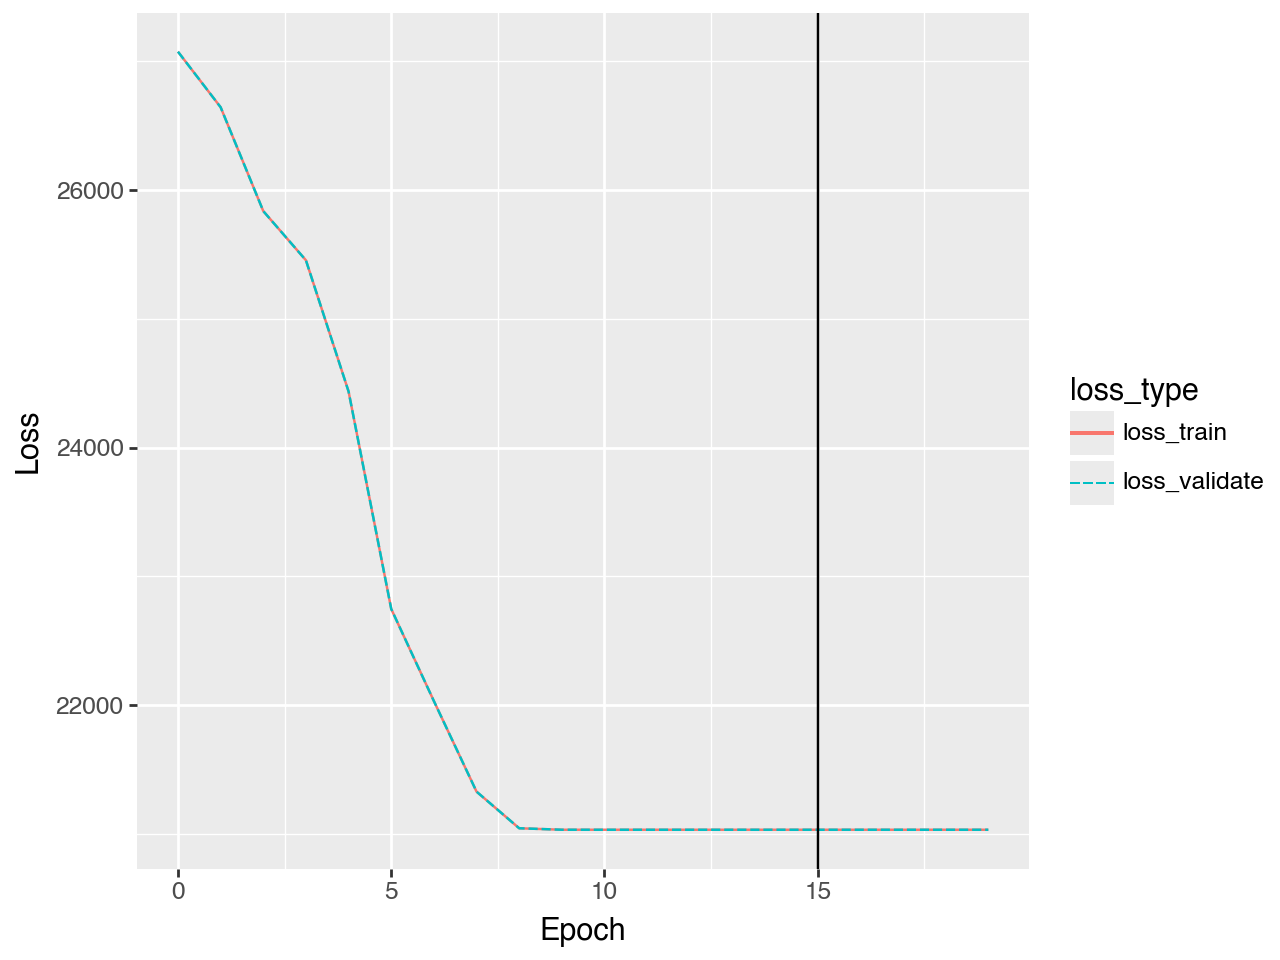

In [45]:
res.plot_loss()

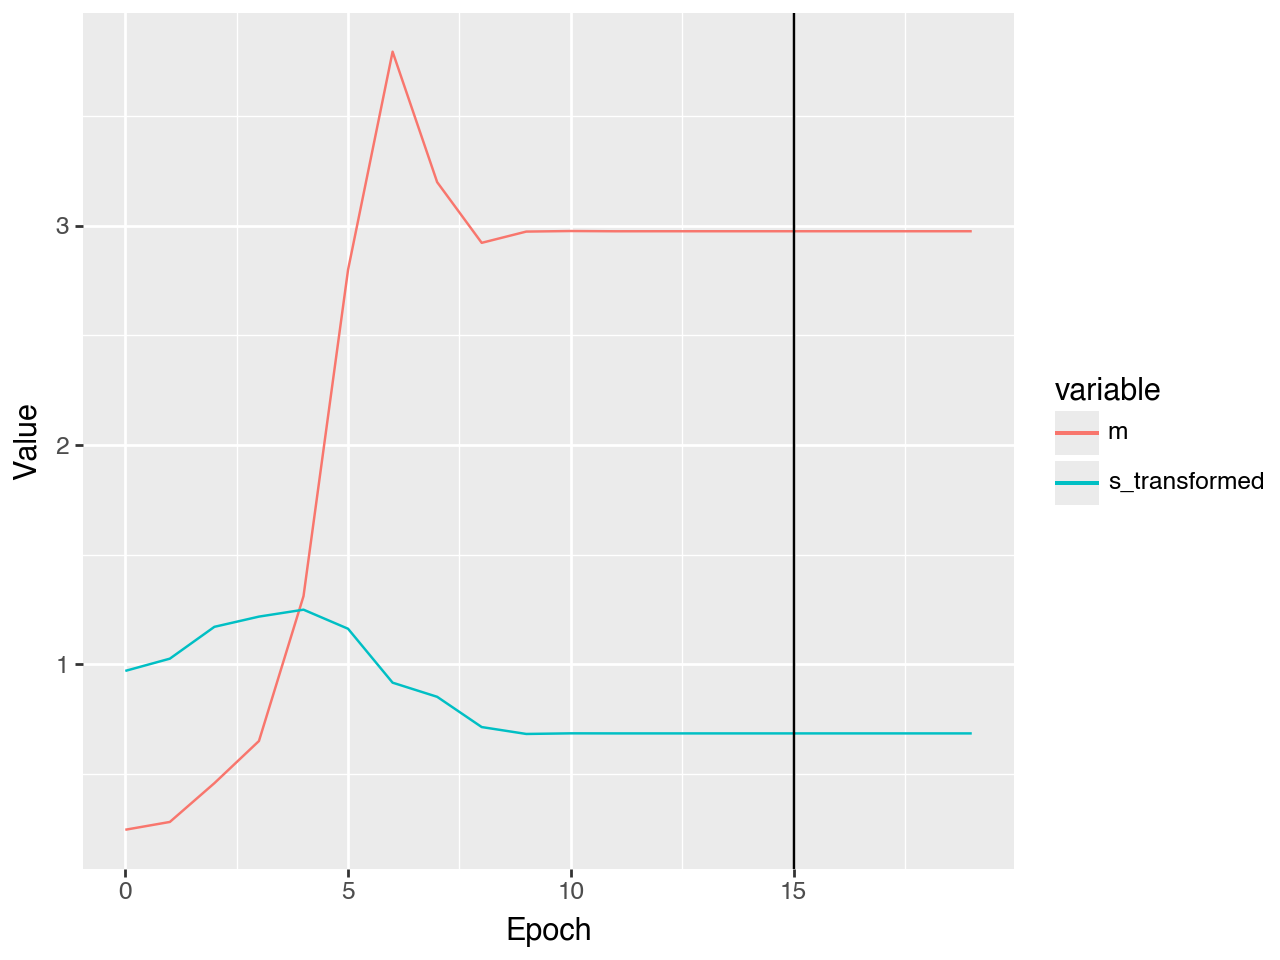

In [46]:
res.plot_params()

In [47]:
opt.PositionSplit.from_model(p, share_validate=0.2)

PositionSplit(train=8000, validate=2000, test=0)

In [48]:
opt.Batches.from_model(p, 128)

Batches(n=10000, batch_size=128, default_axis=0)

In [49]:
engine = opt.QuickOptim(
    p,
    split=opt.PositionSplit.from_model(p, share_validate=0.1, shuffle=True),
    batches=opt.Batches.from_model(p, 32),
    optimizers="adam",
).build_engine()

In [50]:
result = engine.fit()

Training loss: 18922.785, Validation loss: 19007.445:   3%|▎         | 34/1000 [00:00<00:10, 92.96it/s]


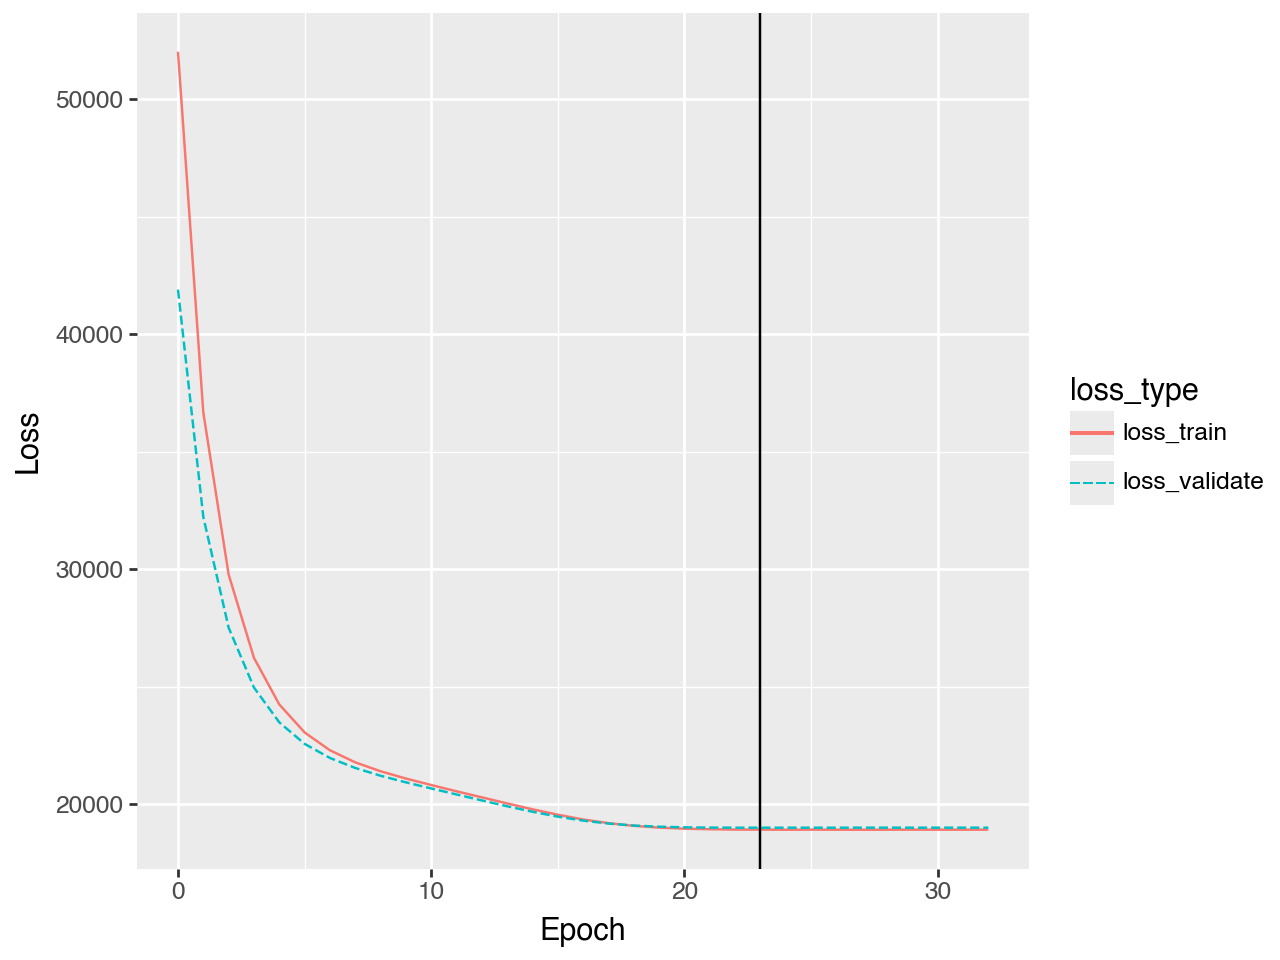

In [51]:
result.plot_loss()

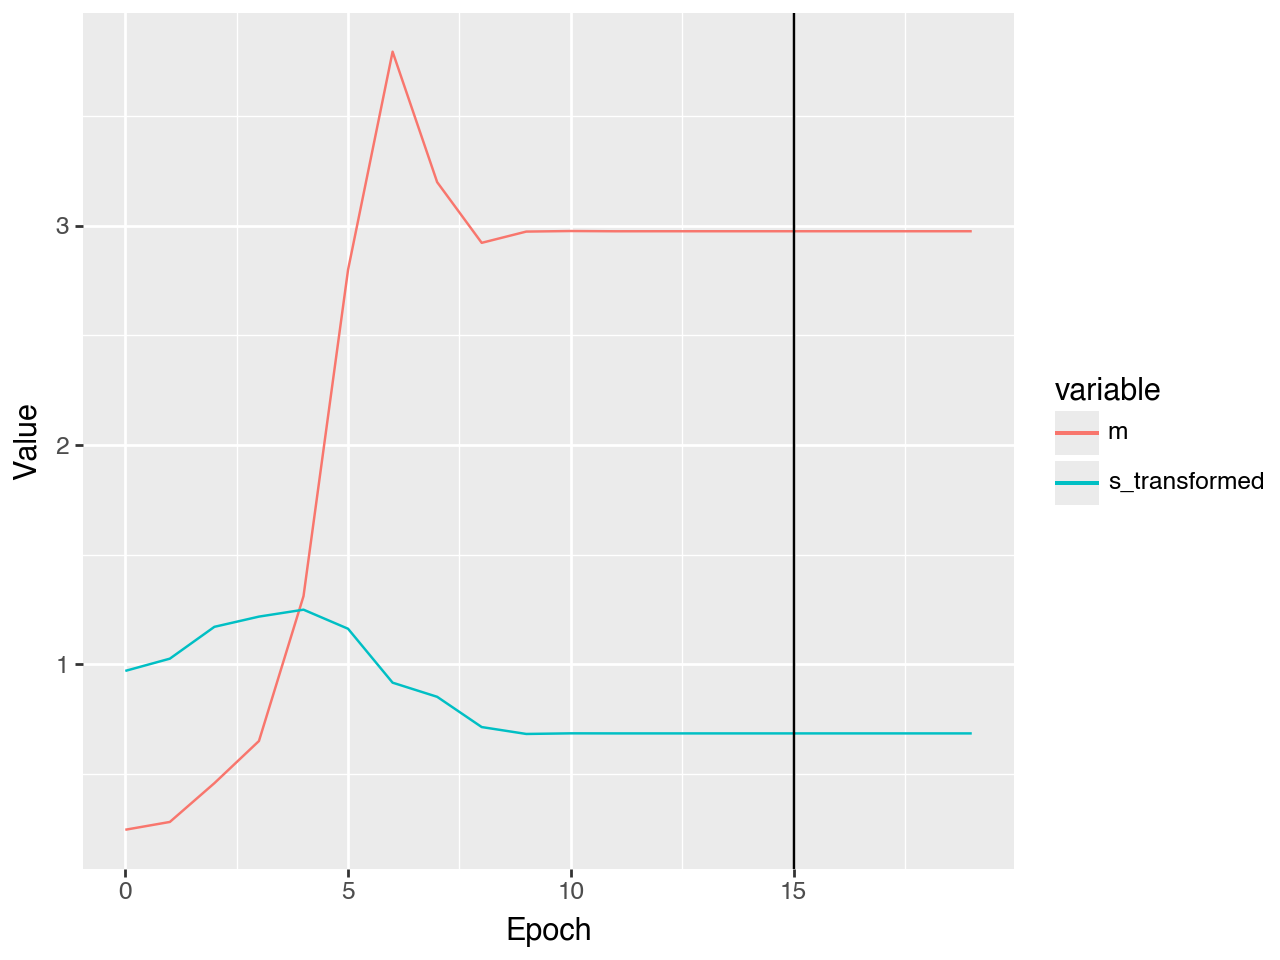

In [52]:
res.plot_params()